<a href="https://colab.research.google.com/github/jlescanog/Telecom_x_Analisis_01/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
# Importar las bibliotecas necesarias
import requests
import pandas as pd

In [ ]:
# URL del archivo JSON con los datos de los clientes
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"


In [ ]:
# Realizar la solicitud para obtener los datos
try:
    respuesta = requests.get(url)
    respuesta.raise_for_status()  # para generar un error si la solicitud no fue exitosa
    datos_json = respuesta.json()

    # Cargar los datos en un DataFrame de pandas
    df_clientes = pd.DataFrame(datos_json)

    print("¡Datos extraídos y cargados exitosamente!")
    print("Primeras 5 filas de los datos:")
    print(df_clientes.head())

except requests.exceptions.RequestException as e:
    print(f"Error al intentar obtener los datos de la URL: {e}")

¡Datos extraídos y cargados exitosamente!
Primeras 5 filas de los datos:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity

#🔧 Transformación

### Estandarización y transformación de datos

In [ ]:
# Ver información general del DataFrame
print("\nInformación general del DataFrame:")
df_clientes.info()

# Revisar si hay valores nulos en cada columna
print("\nCantidad de valores nulos por columna:")
print(df_clientes.isnull().sum())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Cantidad de valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [ ]:
# ('df_clientes' cargado del paso anterior)

# --- Paso de Normalización (Aplanar las columnas anidadas) ---
# Esta es una parte CRUCIAL de la Transformación en ETL.

# Aplanar la columna 'customer'
df_datos_cliente = pd.json_normalize(df_clientes['customer'])

# Aplanar la columna 'phone'
df_datos_telefono = pd.json_normalize(df_clientes['phone'])

# Aplanar la columna 'internet'
df_datos_internet = pd.json_normalize(df_clientes['internet'])

# Aplanar la columna 'account'
df_datos_cuenta = pd.json_normalize(df_clientes['account'])


# --- Unir todas las partes en un único DataFrame ---

# Usamos pd.concat para unir los dataframes por columnas (axis=1)
df_clientes_completo = pd.concat([
    df_clientes[['customerID', 'Churn']], # Tomamos las columnas originales que necesitamos
    df_datos_cliente,
    df_datos_telefono,
    df_datos_internet,
    df_datos_cuenta
], axis=1)

# --- Inspeccionar el nuevo DataFrame aplanado ---
print("¡Datos anidados han sido aplanados exitosamente!")

print("\n--- Información del Nuevo DataFrame Completo ---")
df_clientes_completo.info()

print("\n--- Primeras 5 Filas del DataFrame Completo ---")
print(df_clientes_completo.head())

¡Datos anidados han sido aplanados exitosamente!

--- Información del Nuevo DataFrame Completo ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   obj

In [ ]:
# ('df_clientes_completo' es el DataFrame del paso anterior)
# Hacemos una copia para buenas prácticas y no alterar el df original
df_limpio = df_clientes_completo.copy()

# --- 1. Limpiar Nombres de Columnas ---
# Recordando tu preferencia por nombres en español, los ajustamos.
df_limpio.rename(columns={
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales'
}, inplace=True)


# --- 2. Transformar la columna 'Cargos_Totales' ---
# Primero, convertimos la columna a tipo numérico.
# 'errors='coerce'' es clave aquí: convertirá cualquier valor problemático en 'NaN' (Nulo)
df_limpio['Cargos_Totales'] = pd.to_numeric(df_limpio['Cargos_Totales'], errors='coerce')

# Ahora, revisamos cuántos valores nulos se crearon.
print("Cantidad de valores nulos en 'Cargos_Totales' después de la conversión:")
print(f"{df_limpio['Cargos_Totales'].isnull().sum()} filas")

# Rellenamos los valores nulos. Usaremos la mediana, ya que es robusta a valores extremos.
mediana_cargos_totales = df_limpio['Cargos_Totales'].median()
df_limpio['Cargos_Totales'].fillna(mediana_cargos_totales, inplace=True)
print("Valores nulos en 'Cargos_Totales' han sido rellenados con la mediana.")


# --- 3. Transformar la columna 'Churn' (nuestro objetivo) ---
# Convertimos 'Yes' a 1 y 'No' a 0 para facilitar el análisis
df_limpio['Churn'] = df_limpio['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


# --- Verificación Final ---
print("\n--- Información del DataFrame DESPUÉS de la limpieza final ---")
df_limpio.info()

print("\n--- Verificación de nulos en todo el DataFrame ---")
# Ahora no debería haber ningún valor nulo en las columnas que tratamos.
print(df_limpio.isnull().sum())

Cantidad de valores nulos en 'Cargos_Totales' después de la conversión:
11 filas
Valores nulos en 'Cargos_Totales' han sido rellenados con la mediana.

--- Información del DataFrame DESPUÉS de la limpieza final ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtectio

/tmp/ipython-input-2061989020.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio['Cargos_Totales'].fillna(mediana_cargos_totales, inplace=True)


In [ ]:
# (Asegúrate de tener tu DataFrame 'df_limpio' listo)

print("--- Diagnóstico de Inconsistencias en Variables Categóricas ---")
print("Revisando los valores únicos de cada columna de texto...\n")

# Seleccionamos solo las columnas de tipo 'object' (texto) para revisarlas
# Excluimos 'customerID' porque todos sus valores son únicos por definición
columnas_categoricas = df_limpio.select_dtypes(include=['object']).drop('customerID', axis=1)

# Usamos un bucle para recorrer cada columna y mostrar sus valores únicos
for columna in columnas_categoricas.columns:
    print(f"--- Valores Únicos en la columna: '{columna}' ---")
    print(df_limpio[columna].unique())
    print("\n") # Añadimos un salto de línea para que se lea mejor

--- Diagnóstico de Inconsistencias en Variables Categóricas ---
Revisando los valores únicos de cada columna de texto...

--- Valores Únicos en la columna: 'gender' ---
['Female' 'Male']


--- Valores Únicos en la columna: 'Partner' ---
['Yes' 'No']


--- Valores Únicos en la columna: 'Dependents' ---
['Yes' 'No']


--- Valores Únicos en la columna: 'PhoneService' ---
['Yes' 'No']


--- Valores Únicos en la columna: 'MultipleLines' ---
['No' 'Yes' 'No phone service']


--- Valores Únicos en la columna: 'InternetService' ---
['DSL' 'Fiber optic' 'No']


--- Valores Únicos en la columna: 'OnlineSecurity' ---
['No' 'Yes' 'No internet service']


--- Valores Únicos en la columna: 'OnlineBackup' ---
['Yes' 'No' 'No internet service']


--- Valores Únicos en la columna: 'DeviceProtection' ---
['No' 'Yes' 'No internet service']


--- Valores Únicos en la columna: 'TechSupport' ---
['Yes' 'No' 'No internet service']


--- Valores Únicos en la columna: 'StreamingTV' ---
['Yes' 'No' 'No internet

### Revisamos y corregimos inconsistencias

In [ ]:
print("--- Aplicando Correcciones (Tratamiento de Inconsistencias) ---")

# Lista de columnas de servicios de internet que tienen la categoría 'No internet service'
columnas_a_limpiar = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

# Usamos un bucle y el método .replace() para hacer la limpieza
# Reemplazamos ambos valores por 'No' en todas las columnas necesarias.
for columna in columnas_a_limpiar:
    df_limpio[columna].replace('No internet service', 'No', inplace=True)
    df_limpio[columna].replace('No phone service', 'No', inplace=True)

print("¡Limpieza completada! Se han unificado las categorías.\n")


# --- Verificación Post-Tratamiento ---

# Volvemos a revisar los valores únicos de las columnas que modificamos para confirmar el cambio.
print("--- Verificando los cambios realizados ---")

for columna in columnas_a_limpiar:
    print(f"Nuevos valores únicos en '{columna}':")
    print(df_limpio[columna].unique())
    print() # Un espacio para leer mejor

--- Aplicando Correcciones (Tratamiento de Inconsistencias) ---
¡Limpieza completada! Se han unificado las categorías.

--- Verificando los cambios realizados ---
Nuevos valores únicos en 'OnlineSecurity':
['No' 'Yes']

Nuevos valores únicos en 'OnlineBackup':
['Yes' 'No']

Nuevos valores únicos en 'DeviceProtection':
['No' 'Yes']

Nuevos valores únicos en 'TechSupport':
['Yes' 'No']

Nuevos valores únicos en 'StreamingTV':


/tmp/ipython-input-2160192391.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[columna].replace('No internet service', 'No', inplace=True)
/tmp/ipython-input-2160192391.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

['Yes' 'No']

Nuevos valores únicos en 'StreamingMovies':
['No' 'Yes']

Nuevos valores únicos en 'MultipleLines':
['No' 'Yes']



Estandarizamos mas Yes y No a binarios 1 y o

In [ ]:
# (tener DataFrame 'df_limpio' con todas las correcciones anteriores)
# Creamos una nueva copia para este paso de estandarización final
df_estandarizado = df_limpio.copy()

print("--- Ejecutando Paso 2: Estandarización y Transformación ---")

# --- Tarea: Convertir valores textuales a binarios (1/0) ---
print("\n1. Estandarizando columnas 'Yes'/'No' a formato numérico (1/0)...")

# La columna 'Churn' ya fue convertida, ahora convertiremos el resto.
columnas_convertidas = []
# Iteramos sobre las columnas de tipo 'object' (texto)
for columna in df_estandarizado.select_dtypes(include=['object']).columns:

    # Verificamos si sus únicos valores son 'Yes' y 'No'
    if set(df_estandarizado[columna].unique()) == {'Yes', 'No'}:
        # Si es así, aplicamos la conversión
        df_estandarizado[columna] = df_estandarizado[columna].apply(lambda x: 1 if x == 'Yes' else 0)
        columnas_convertidas.append(columna)

print(f"   - Columnas convertidas exitosamente: {columnas_convertidas}")
print("   - La columna 'Churn' ya había sido convertida previamente.")

# --- Tarea: Renombrar columnas (ya realizado, solo se documenta) ---
print("\n2. Renombrar columnas para mayor claridad (Paso ya completado anteriormente).")


# --- Verificación Final de la Estandarización ---
print("\n--- Verificando los tipos de datos del DataFrame Estandarizado ---")
# Observamos muchas columnas 'object' ahora serán 'int64'
df_estandarizado.info()

--- Ejecutando Paso 2: Estandarización y Transformación ---

1. Estandarizando columnas 'Yes'/'No' a formato numérico (1/0)...
   - Columnas convertidas exitosamente: ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
   - La columna 'Churn' ya había sido convertida previamente.

2. Renombrar columnas para mayor claridad (Paso ya completado anteriormente).

--- Verificando los tipos de datos del DataFrame Estandarizado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   D

#📊 Carga y análisis

**análisis descriptivo** de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes

In [ ]:
# (Asegúrate de tener tu DataFrame 'df_estandarizado' listo)

print("--- Análisis Descriptivo del Comportamiento de Clientes ---")
# Usamos .describe() para obtener las estadísticas de todas las columnas numéricas.
# El método calcula automáticamente la media, mediana, std, etc.
analisis_descriptivo = df_estandarizado.describe()

# Usamos .T (transponer) para que la tabla sea más fácil de leer,
# con las columnas como filas.
print(analisis_descriptivo.T)

--- Análisis Descriptivo del Comportamiento de Clientes ---
                   count         mean          std    min      25%     50%  \
Churn             7267.0     0.257190     0.437115   0.00    0.000     0.0   
SeniorCitizen     7267.0     0.162653     0.369074   0.00    0.000     0.0   
Partner           7267.0     0.484106     0.499782   0.00    0.000     0.0   
Dependents        7267.0     0.300124     0.458343   0.00    0.000     0.0   
tenure            7267.0    32.346498    24.571773   0.00    9.000    29.0   
PhoneService      7267.0     0.902711     0.296371   0.00    1.000     1.0   
MultipleLines     7267.0     0.421770     0.493876   0.00    0.000     0.0   
OnlineSecurity    7267.0     0.285950     0.451897   0.00    0.000     0.0   
OnlineBackup      7267.0     0.344571     0.475261   0.00    0.000     0.0   
DeviceProtection  7267.0     0.342782     0.474672   0.00    0.000     0.0   
TechSupport       7267.0     0.289528     0.453575   0.00    0.000     0.0   
Stre

Esta tabla nos da una primera fotografía de "quién es" el cliente promedio de Telecom X.

Tasa de Evasión (Churn): La media (mean) de Churn es 0.257. Esto es un dato clave para el negocio: **El 25.7% de los clientes en este conjunto de datos cancelaron su servicio**. Esta es la métrica principal que la empresa quiere reducir.

**Perfil del Cliente:**

Edad (SeniorCitizen): La media es 0.16, lo que significa que solo el 16% de los clientes son de la tercera edad. La base de clientes es predominantemente joven o de mediana edad.

Situación Familiar (Partner, Dependents): Casi la mitad de los clientes (48%) tienen pareja, pero solo un 30% tienen dependientes.

**Antigüedad y Lealtad (tenure):**

La antigüedad media (mean) es de 32.3 meses (cerca de 2 años y 8 meses).

La mediana (50%) es de 29 meses. Esto nos dice que la mitad de los clientes tienen menos de 29 meses en la empresa, lo que refuerza la idea de que hay una gran cantidad de clientes relativamente nuevos.

**Adopción de Servicios:**

El servicio telefónico (PhoneService) es masivo, con un 90% de adopción.

Sin embargo, los servicios adicionales de internet como OnlineSecurity (28%), TechSupport (28%), y DeviceProtection (34%) tienen una adopción bastante baja. ¡Esto podría ser una oportunidad de negocio para Telecom X!

**Facturación y Pagos:**

Cargos Mensuales: Hay una gran dispersión (ver std de 30.12). Los clientes pagan desde $18.25 (min) hasta $118.75 (max) al mes. La mitad de los clientes paga menos de $70.3 (50% o mediana).

Facturación sin Papel (PaperlessBilling): Una mayoría del 59% de los clientes ya usa la facturación electrónica.

## Distribución de evasión

Para esta gráfica específica, usaremos el `DataFrame` `df_limpio`, ya que conserva las etiquetas de texto "Yes" y "No" en la columna `Churn` original (antes de que la convirtiéramos a 1/0 en `df_estandarizado`), lo que hará que el gráfico sea un poco más intuitivo de leer.

--- Análisis de la Distribución de Evasión de Clientes ---


/tmp/ipython-input-3440523136.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_churn = sns.countplot(x='Churn', data=df_limpio, palette=['#6495ED', '#FF6347']) # Azul y Rojo


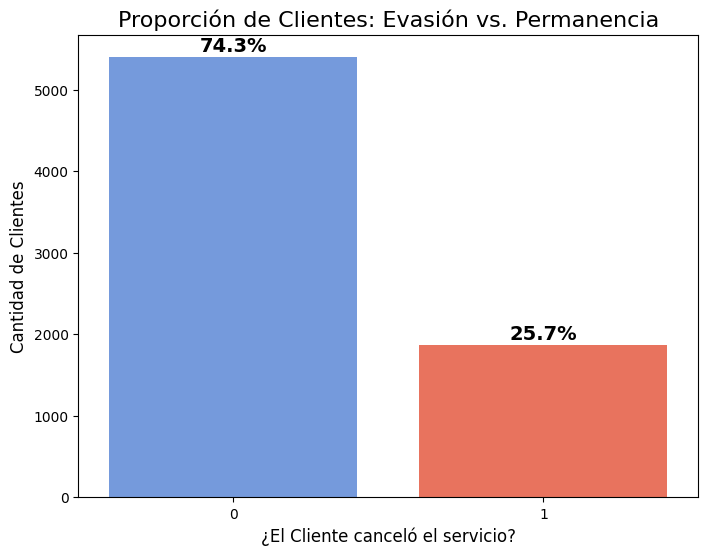

In [ ]:
# Importar las bibliotecas de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# (tener DataFrame 'df_limpio' listo)

print("--- Análisis de la Distribución de Evasión de Clientes ---")

# --- Creación del Gráfico ---
plt.figure(figsize=(8, 6))

# Usamos sns.countplot para contar las ocurrencias en la columna 'Churn'
grafico_churn = sns.countplot(x='Churn', data=df_limpio, palette=['#6495ED', '#FF6347']) # Azul y Rojo

plt.title('Proporción de Clientes: Evasión vs. Permanencia', fontsize=16)
plt.xlabel('¿El Cliente canceló el servicio?', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

# --- Añadir Anotaciones de Porcentaje ---
# Este bucle calcula y añade el porcentaje sobre cada barra para máxima claridad
total_clientes = len(df_limpio)
for p in grafico_churn.patches:
    porcentaje = '{:.1f}%'.format(100 * p.get_height() / total_clientes)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    grafico_churn.annotate(porcentaje, (x, y), ha='center', va='center', size=14, xytext=(0, 8), textcoords='offset points', weight='bold')

plt.show()

## Recuento de evasión por variables categóricas

El objetivo, como bien dice tu guía, es ver si ciertos grupos de clientes tienen una mayor tendencia a cancelar. Para ello, crearemos gráficos de barras que separen a los clientes que se fueron de los que se quedaron para cada categoría.

Nuevamente, usaremos el `DataFrame` `df_limpio`, ya que sus etiquetas de texto (`Month-to-month`, `DSL`, `Female`, etc.) son perfectas para los ejes de nuestros gráficos, haciéndolos claros y fáciles de presentar.


--- Análisis de Evasión por Variables Categóricas ---


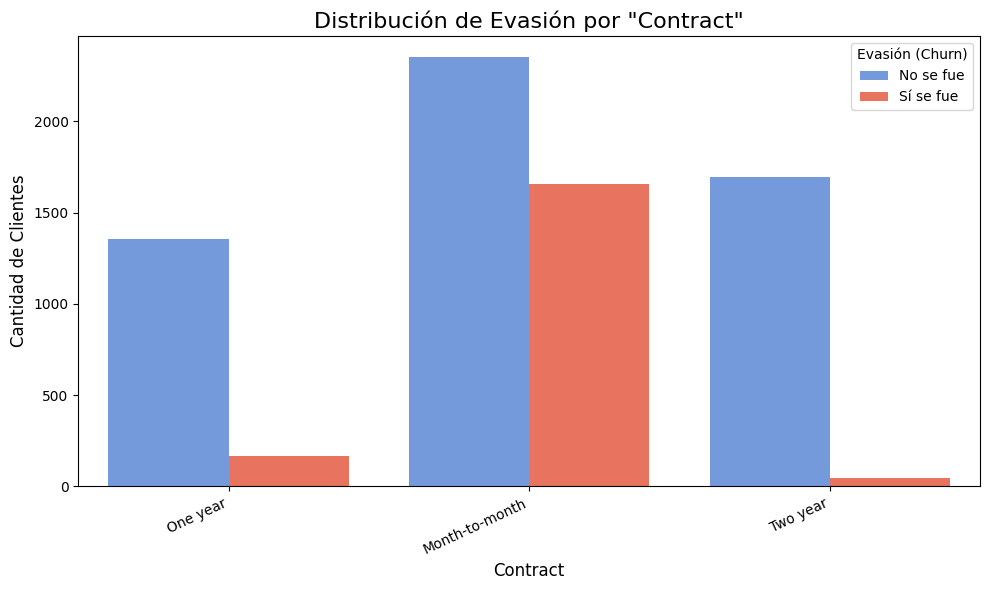

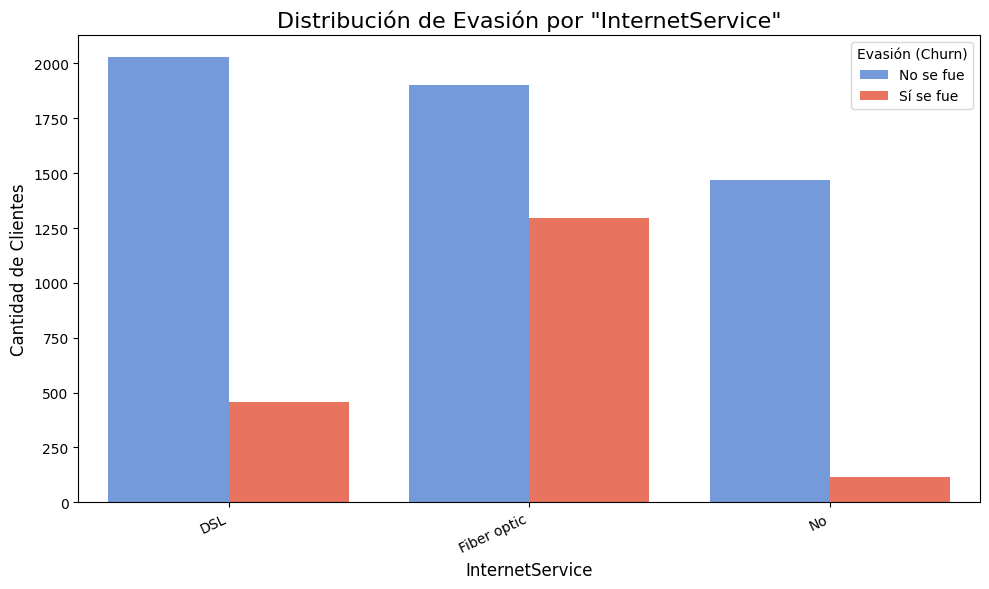

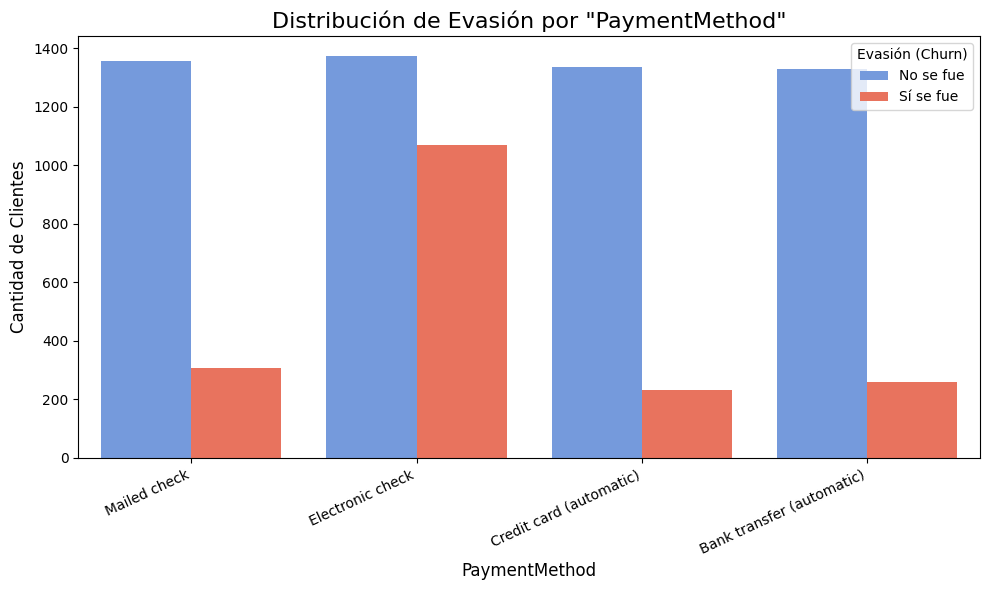

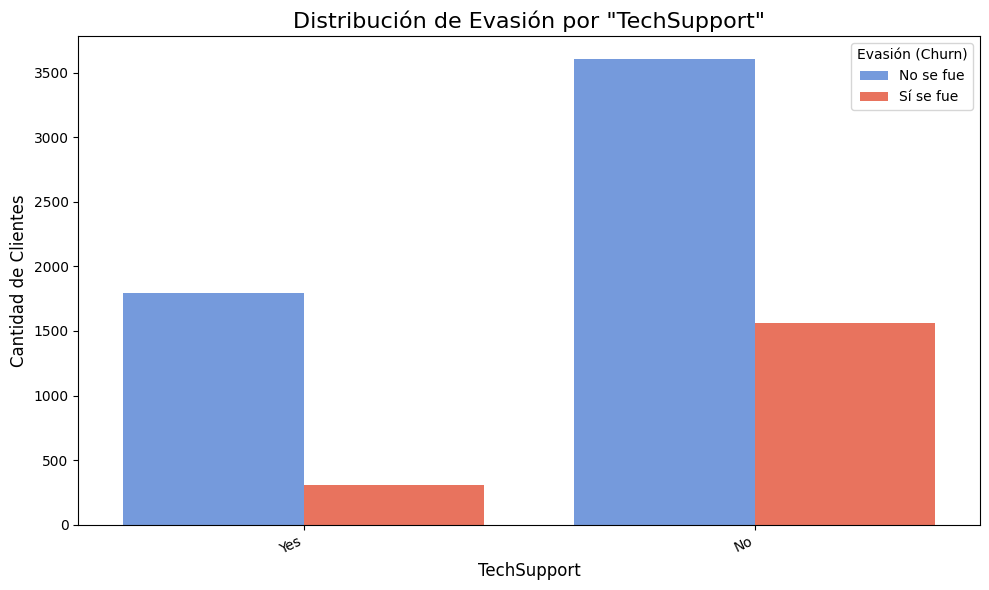

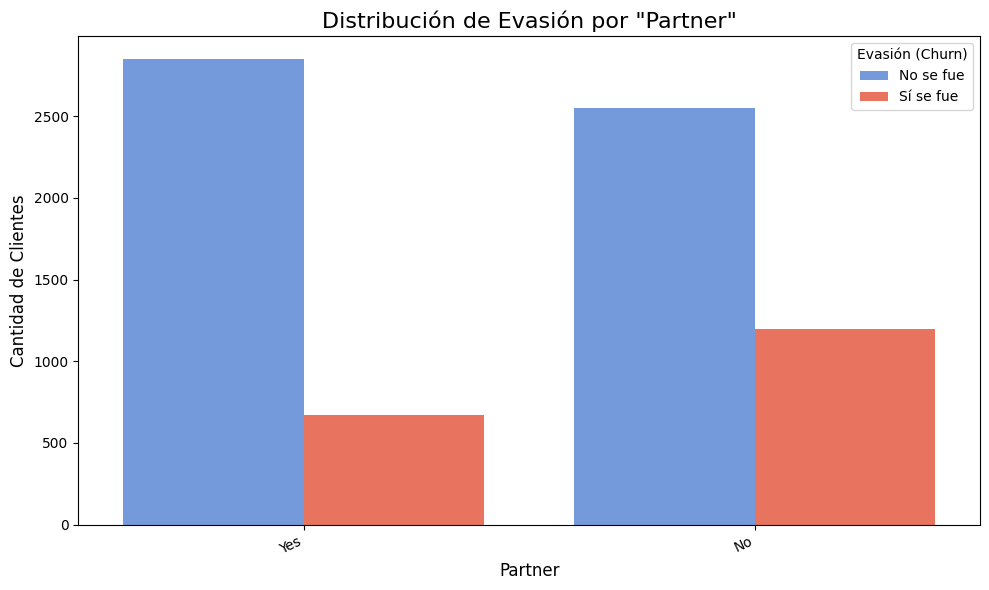

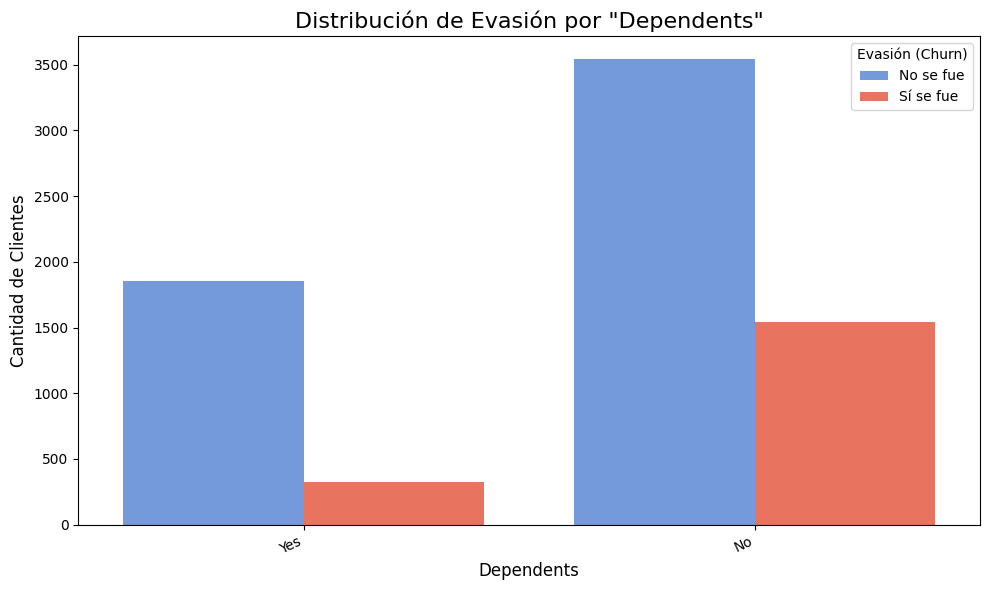

In [ ]:
# Importar las bibliotecas de visualización
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Análisis de Evasión por Variables Categóricas ---")

# --- Definimos las columnas que queremos analizar ---
# Hemos seleccionado las más relevantes según nuestro análisis previo.
columnas_categoricas_clave = [
    'Contract',          # Tipo de Contrato
    'InternetService',   # Tipo de Servicio de Internet
    'PaymentMethod',     # Método de Pago
    'TechSupport',       # Si tienen Soporte Técnico
    'Partner',           # Si tienen pareja
    'Dependents'         # Si tienen dependientes
]

# --- Bucle para crear un gráfico para cada columna ---
for columna in columnas_categoricas_clave:
    plt.figure(figsize=(10, 6))

    # En 'palette', pasamos una lista con los colores que queremos.
    colores_personalizados = ['#6495ED', '#FF6347'] # Un azul (cornflowerblue) y un rojo (tomato)

    # Creamos el gráfico de barras, usando 'hue' para separar por 'Churn'
    sns.countplot(x=columna, hue='Churn', data=df_limpio, palette=colores_personalizados)

    plt.title(f'Distribución de Evasión por "{columna}"', fontsize=16)
    plt.xlabel(columna, fontsize=12)
    plt.ylabel('Cantidad de Clientes', fontsize=12)

    # Rotamos las etiquetas del eje X si son muy largas para que no se solapen
    plt.xticks(rotation=25, ha='right')

    # Añadimos la leyenda
    plt.legend(title='Evasión (Churn)', labels=['No se fue', 'Sí se fue'])

    plt.tight_layout() # Ajusta el gráfico para que todo encaje bien
    plt.show()

### Opiniones:

Sobre **Contract**: Totalmente de acuerdo. Este es, sin duda, el hallazgo más importante. Los clientes con contrato Month-to-month son, por un amplio margen, el grupo con mayor riesgo de evasión. Tu hipótesis sobre la "libertad del contrato" es muy acertada. No tienen barreras para irse, por lo que cualquier pequeña insatisfacción puede llevar a una cancelación.

Sobre **InternetService**: Este es uno de los hallazgos más interesantes y que invitan a pensar. ¿Por qué los clientes con Fiber optic (un servicio teóricamente superior) se van más? Esto podría indicar:

Problemas de Calidad/Precio: Quizás el servicio de fibra de Telecom X es más caro o más inestable que el de la competencia.

Perfil del Cliente: Los clientes que eligen fibra pueden ser más exigentes tecnológicamente y menos tolerantes a fallos.

Ofertas Agresivas de la Competencia: La competencia podría estar enfocando sus ofertas en robar este tipo de clientes.

Sobre **PaymentMethod**: Otro gran descubrimiento. Que los clientes con Electronic check se vayan más es una señal de alerta. Puede deberse a un proceso de pago complicado, errores en la facturación o simplemente ser una característica común en el perfil de cliente que prefiere contratos flexibles.

Sobre **TechSupport**: ¡Perfecto! Has identificado un factor de retención clave. Los clientes que SÍ tienen soporte técnico se van mucho menos. Esto demuestra que sentirse respaldado y tener a quién recurrir con problemas es un factor muy importante para la lealtad del cliente.

## Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

--- Análisis de Distribución de Evasión por Variables Numéricas ---


/tmp/ipython-input-693762334.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=variable, data=df_limpio, palette=colores_personalizados)


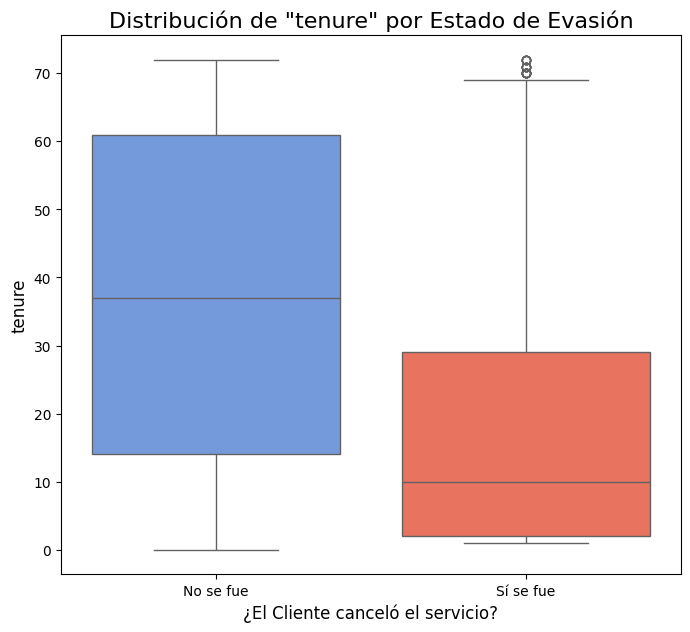

/tmp/ipython-input-693762334.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=variable, data=df_limpio, palette=colores_personalizados)


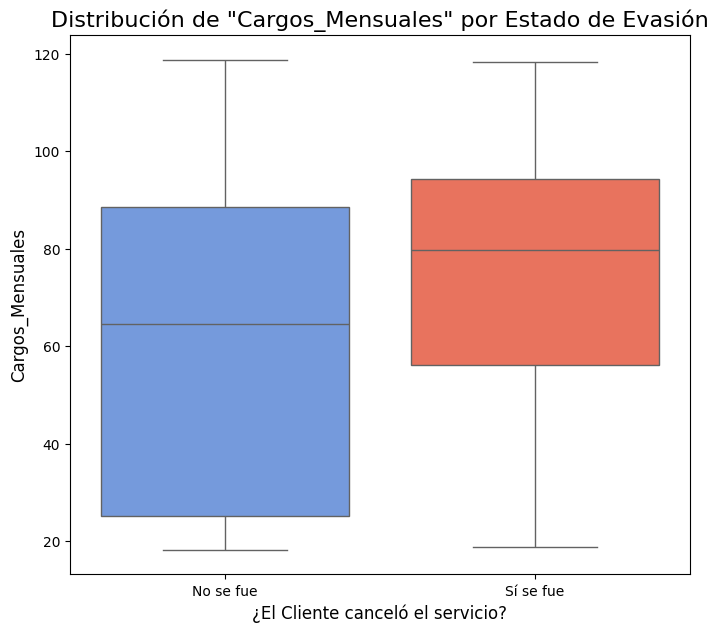

/tmp/ipython-input-693762334.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=variable, data=df_limpio, palette=colores_personalizados)


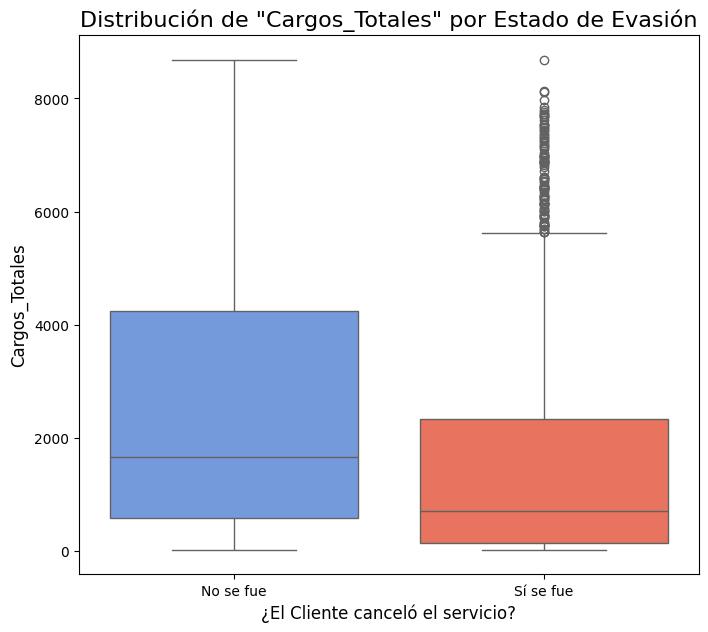

In [ ]:
# Importar las bibliotecas de visualización
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Análisis de Distribución de Evasión por Variables Numéricas ---")

# --- Definimos las variables numéricas que vamos a analizar ---
variables_numericas = ['tenure', 'Cargos_Mensuales', 'Cargos_Totales']

# --- Definimos nuestra paleta de colores personalizada ---
colores_personalizados = ['#6495ED', '#FF6347'] # Azul para 'No se fue', Rojo para 'Sí se fue'

# --- Creamos un bucle para generar un gráfico para cada variable ---
for variable in variables_numericas:
    plt.figure(figsize=(8, 7))

    # Creamos un gráfico de cajas (boxplot)
    sns.boxplot(x='Churn', y=variable, data=df_limpio, palette=colores_personalizados)

    # Ponemos el título y etiquetas en español
    plt.title(f'Distribución de "{variable}" por Estado de Evasión', fontsize=16)
    plt.xlabel('¿El Cliente canceló el servicio?', fontsize=12)
    plt.ylabel(variable, fontsize=12)

    # Nos aseguramos de que las etiquetas del eje X sean claras
    plt.xticks(ticks=[0, 1], labels=['No se fue', 'Sí se fue'])

    plt.show()

### Analisis Extra

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

🔹 La relación entre la cuenta diaria y la evasión.
🔹 Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la función `corr()` de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

## Creando Nuevas Variables (Feature Engineering)

(Usaremos el data frame `df_estandarizado` ya que `.corn()` solo funciona con datos numericos.)

Primero, vamos a crear las dos variables sugeridas en la descripción de la tarea.


In [ ]:
# Hacemos una copia para trabajar de forma segura
df_analisis_final = df_estandarizado.copy()

# --- Tarea: Crear nuevas variables ---
print("--- Creando nuevas características para un análisis más profundo ---")

# 1. Crear 'Cargos_Diarios'
# Usamos una aproximación de 30 días por mes.
df_analisis_final['Cargos_Diarios'] = df_analisis_final['Cargos_Mensuales'] / 30
print("   - Se creó la columna 'Cargos_Diarios'.")

# 2. Crear 'Num_Servicios' (Cantidad de servicios contratados)
# Sumamos todos los servicios adicionales que un cliente puede tener (son columnas con 1s y 0s)
lista_de_servicios = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
df_analisis_final['Num_Servicios'] = df_analisis_final[lista_de_servicios].sum(axis=1)
print("   - Se creó la columna 'Num_Servicios'.")

# Verificamos las nuevas columnas
print("\nPrimeras filas con las nuevas características:")
print(df_analisis_final[['customerID', 'Cargos_Diarios', 'Num_Servicios']].head())

--- Creando nuevas características para un análisis más profundo ---
   - Se creó la columna 'Cargos_Diarios'.
   - Se creó la columna 'Num_Servicios'.

Primeras filas con las nuevas características:
   customerID  Cargos_Diarios  Num_Servicios
0  0002-ORFBO        2.186667              4
1  0003-MKNFE        1.996667              3
2  0004-TLHLJ        2.463333              2
3  0011-IGKFF        3.266667              5
4  0013-EXCHZ        2.796667              3


## Preparación Final y Matriz de Correlación

Algunas columnas de texto (gender, InternetService, etc.). Para poder incluirlas en la matriz de correlación, debemos convertirlas a un formato numérico. Usaremos una técnica estándar llamada **One-Hot** Encoding con `pd.get_dummies()`. Esta técnica crea nuevas columnas binarias (0 o 1) para cada categoría. Por ejemplo, la columna gender se convertirá en `gender_Male` (1 si es hombre, 0 si no).



--- Ranking de Factores de Correlación con la Evasión (Churn) ---
Churn                                    1.000000
InternetService_Fiber optic              0.300949
PaymentMethod_Electronic check           0.294626
Cargos_Diarios                           0.189866
Cargos_Mensuales                         0.189866
PaperlessBilling                         0.186666
SeniorCitizen                            0.146733
StreamingTV                              0.062430
StreamingMovies                          0.060586
MultipleLines                            0.039343
PhoneService                             0.012571
gender_Male                             -0.009555
DeviceProtection                        -0.063452
Num_Servicios                           -0.064642
OnlineBackup                            -0.080163
PaymentMethod_Mailed check              -0.090061
PaymentMethod_Credit card (automatic)   -0.131085
Partner                                 -0.148546
TechSupport                     

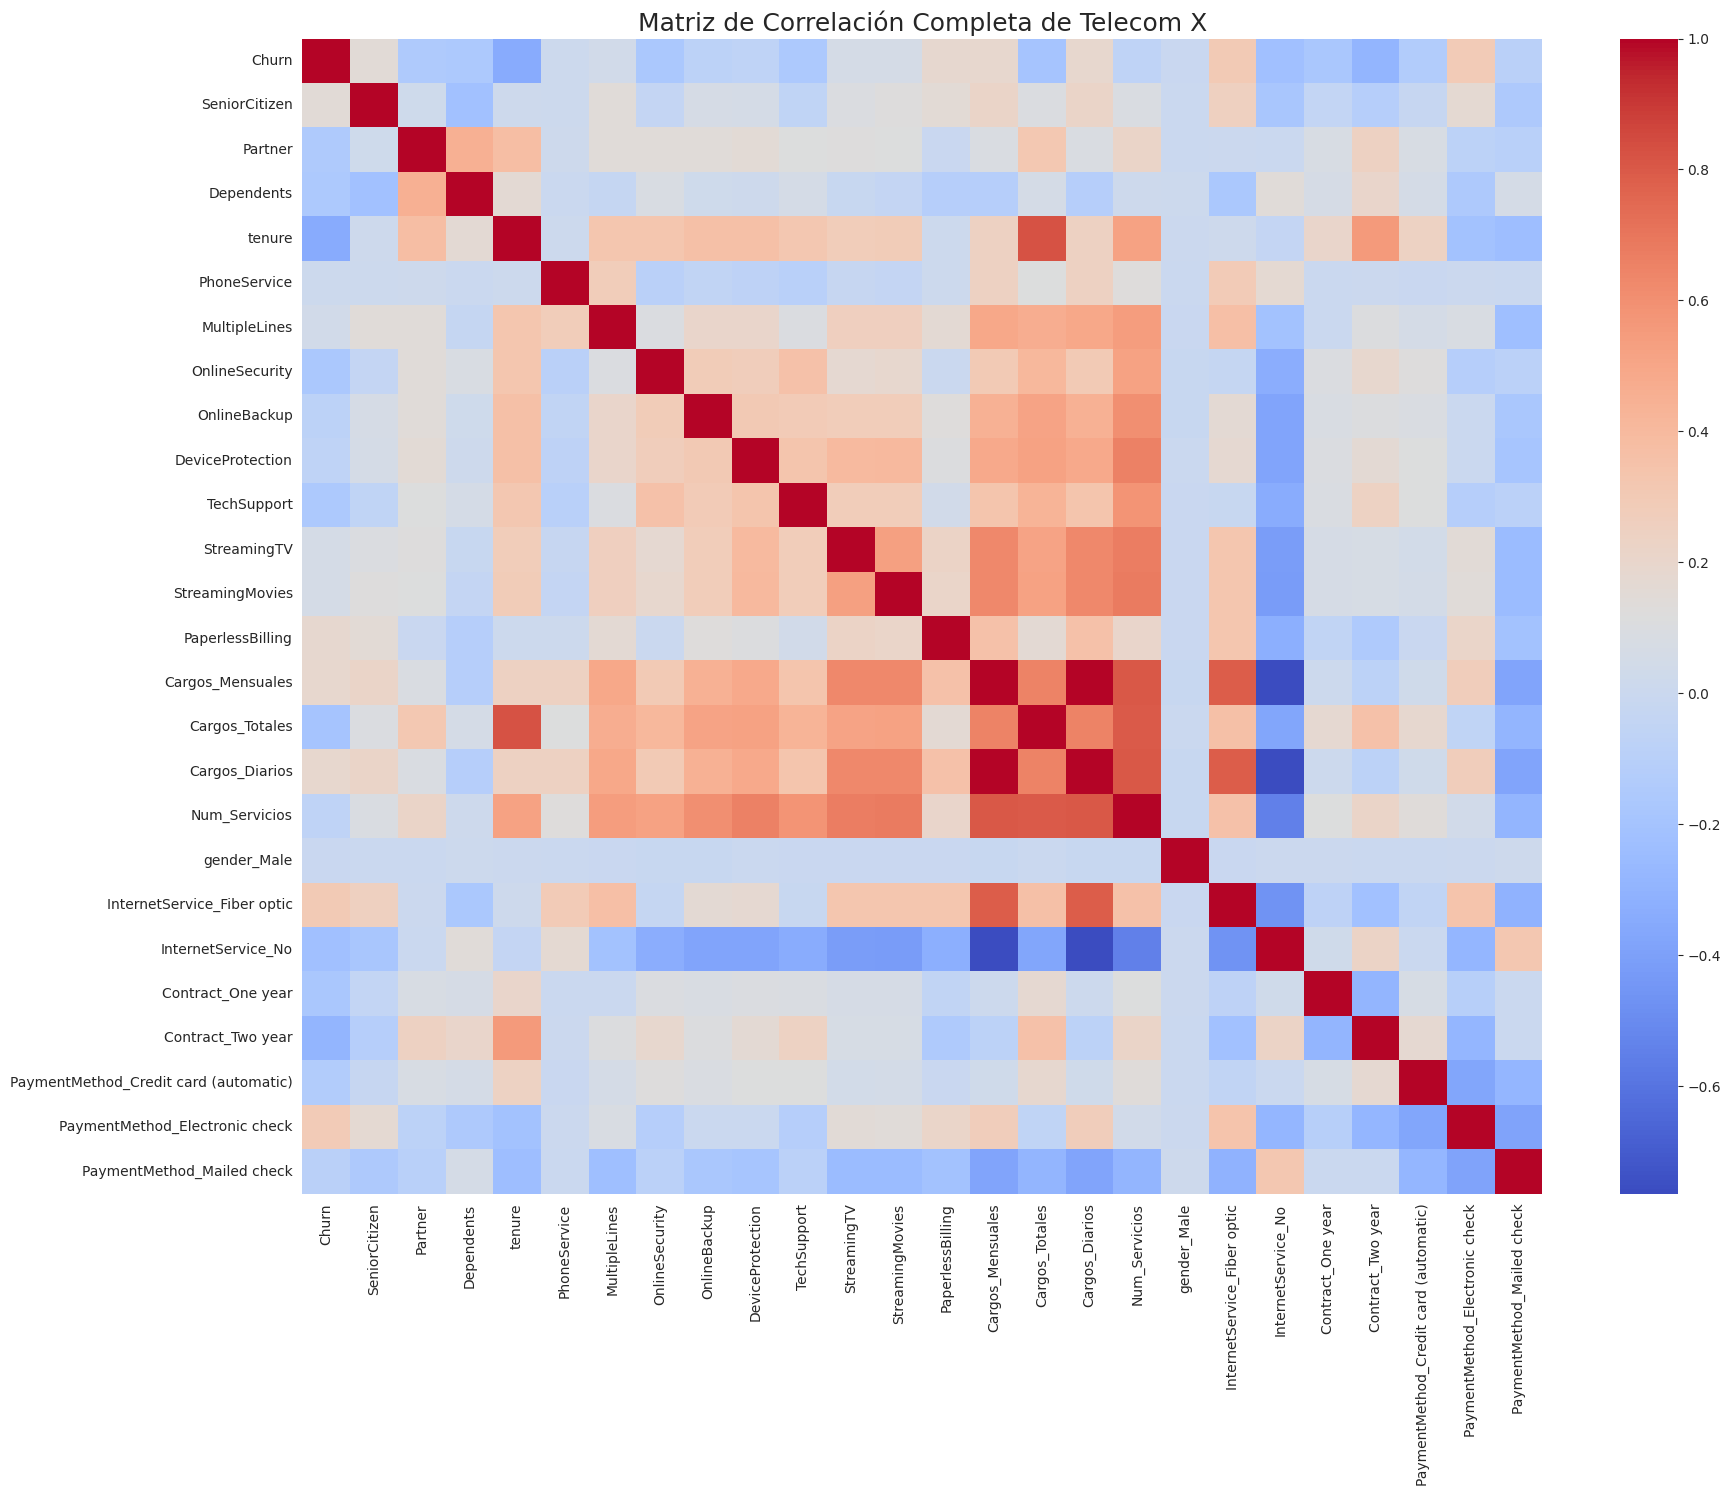

In [ ]:
# Importar las bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# --- Tarea: Calcular y visualizar la correlación ---

# Hacemos una copia para trabajar
df_para_heatmap = df_analisis_final.copy()

# 1. PRIMERO, eliminamos el ID del cliente que no aporta al análisis
df_para_heatmap.drop('customerID', axis=1, inplace=True)

# 2. SEGUNDO, ahora que ya no está el 'customerID', aplicamos get_dummies al resto de columnas de texto
df_para_heatmap = pd.get_dummies(df_para_heatmap, drop_first=True)

# Calculamos la matriz de correlación completa
matriz_correlacion_final = df_para_heatmap.corr()

# --- Visualización 1: El Ranking de Factores ---
# Esta es la parte más importante: ver qué se correlaciona más con 'Churn'
correlacion_con_churn = matriz_correlacion_final['Churn'].sort_values(ascending=False)

print("\n\n--- Ranking de Factores de Correlación con la Evasión (Churn) ---")
print(correlacion_con_churn)


# --- Visualización 2: El Mapa de Calor (Heatmap) ---
# Este gráfico nos da la visión completa de todas las relaciones
plt.figure(figsize=(20, 15))
# Ponemos annot=False porque son demasiadas columnas y los números no se leerían bien
sns.heatmap(matriz_correlacion_final, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación Completa de Telecom X', fontsize=18)
plt.show()

## Extras

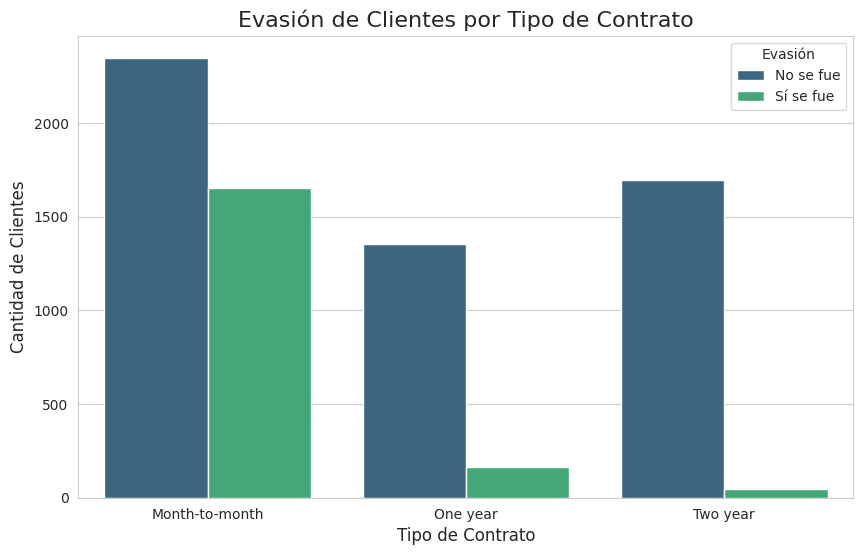

/tmp/ipython-input-3417446420.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_limpio, ax=axes[0], palette='coolwarm')
/tmp/ipython-input-3417446420.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No se fue', 'Sí se fue'])
/tmp/ipython-input-3417446420.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Cargos_Mensuales', data=df_limpio, ax=axes[1], palette='plasma')
/tmp/ipython-input-3417446420.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator

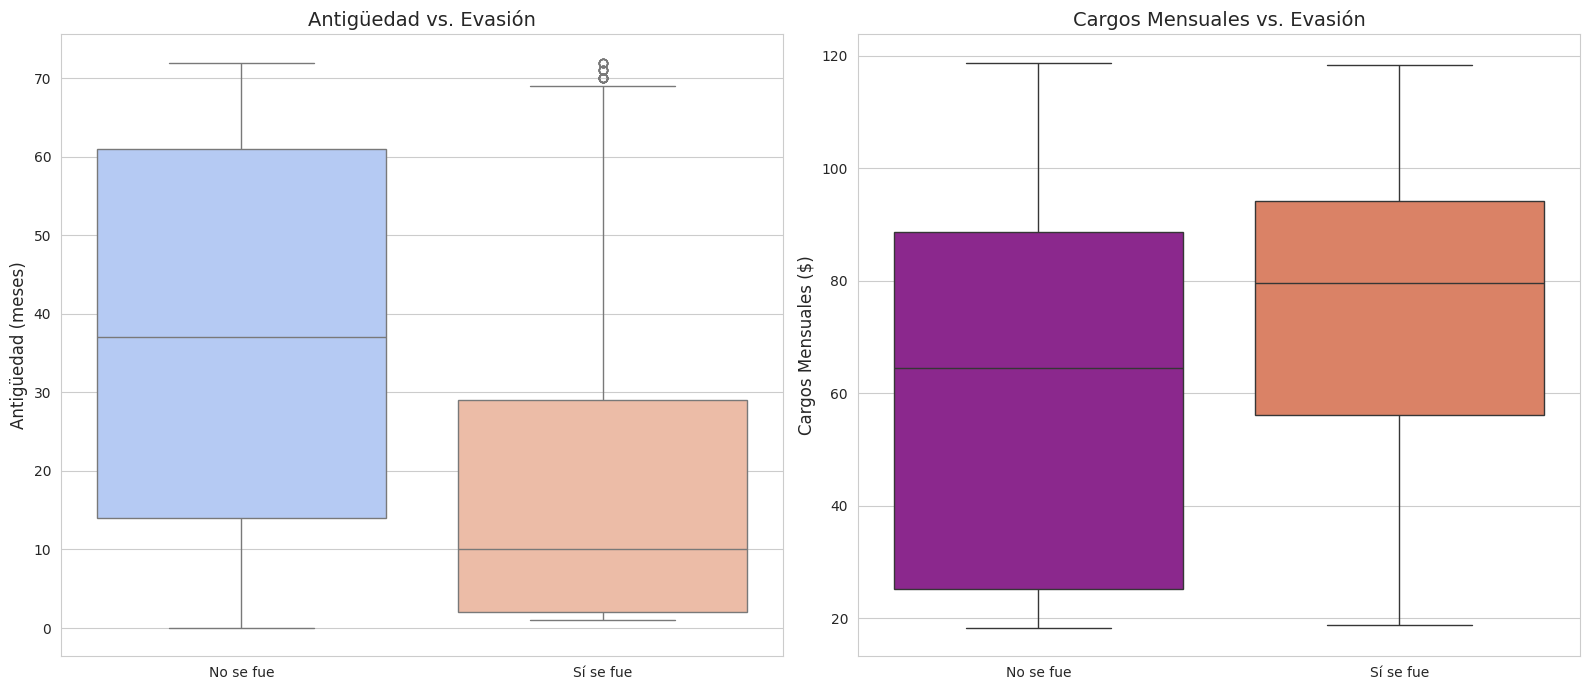

In [ ]:
# Importar las bibliotecas de visualización que vamos a necesitar
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar un estilo visual atractivo para las gráficas
sns.set_style("whitegrid")

# --- ANÁLISIS 2: ¿El tipo de contrato es un factor decisivo? ---
# Esta suele ser una de las variables más influyentes.

plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df_limpio, palette='viridis', order=['Month-to-month', 'One year', 'Two year'])
plt.title('Evasión de Clientes por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='Evasión', labels=['No se fue', 'Sí se fue'])
plt.show()


# --- ANÁLISIS 3: ¿Cómo influyen la antigüedad y los cargos mensuales? ---
# Analizamos dos variables numéricas clave.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

# Gráfico de cajas para la Antigüedad (tenure)
sns.boxplot(x='Churn', y='tenure', data=df_limpio, ax=axes[0], palette='coolwarm')
axes[0].set_title('Antigüedad vs. Evasión', fontsize=14)
axes[0].set_xticklabels(['No se fue', 'Sí se fue'])
axes[0].set_xlabel('')
axes[0].set_ylabel('Antigüedad (meses)', fontsize=12)

# Gráfico de cajas para los Cargos Mensuales
sns.boxplot(x='Churn', y='Cargos_Mensuales', data=df_limpio, ax=axes[1], palette='plasma')
axes[1].set_title('Cargos Mensuales vs. Evasión', fontsize=14)
axes[1].set_xticklabels(['No se fue', 'Sí se fue'])
axes[1].set_xlabel('')
axes[1].set_ylabel('Cargos Mensuales ($)', fontsize=12)

plt.tight_layout()
plt.show()

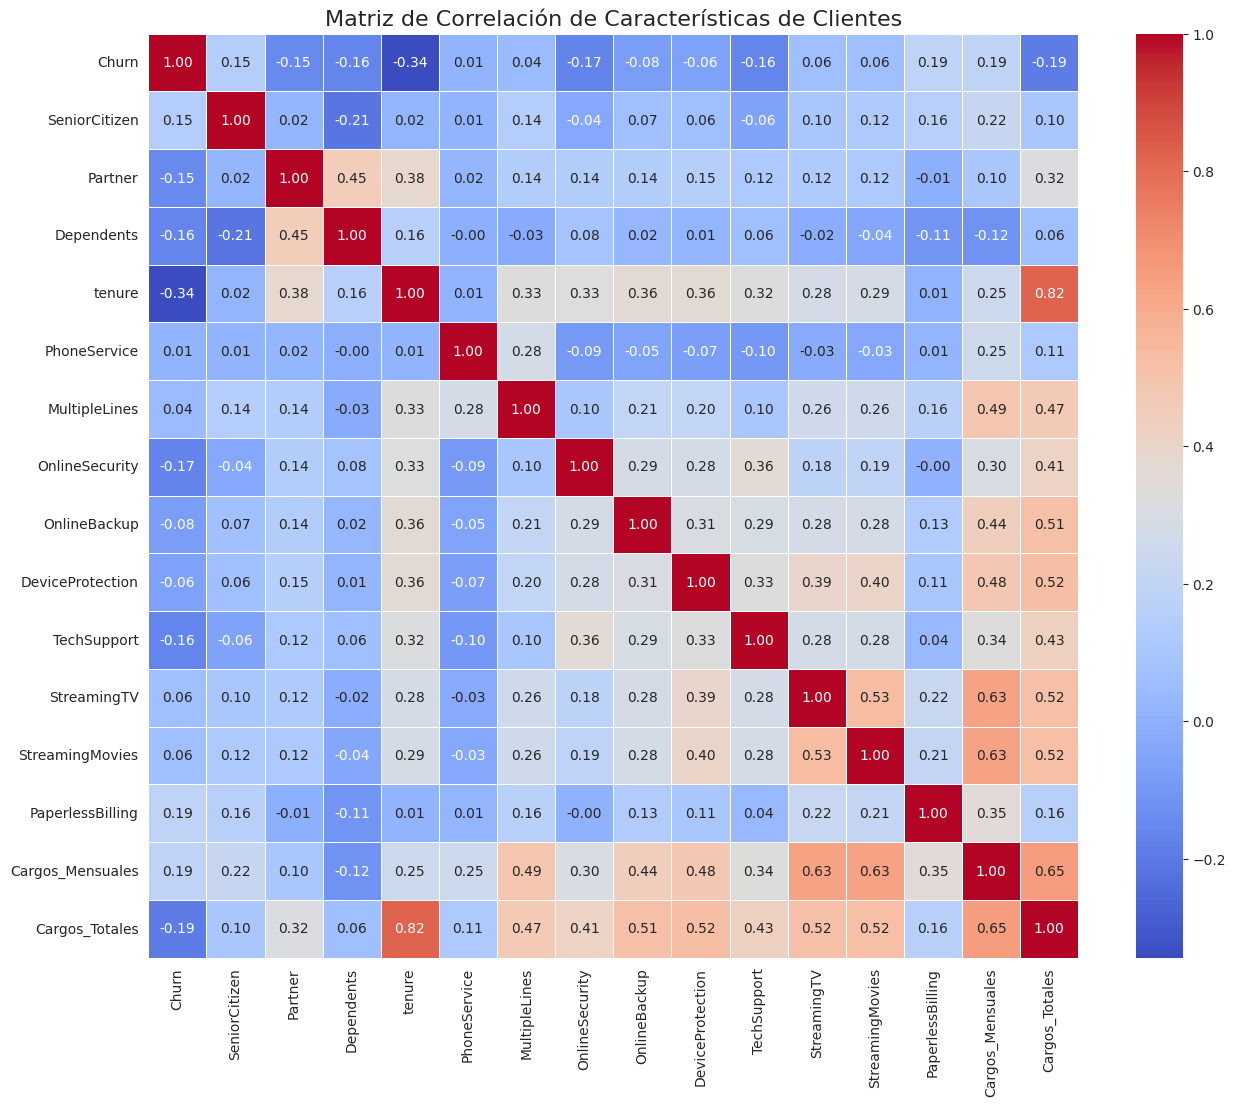


--- Factores más correlacionados con la Evasión (Churn) ---
Churn               1.000000
Cargos_Mensuales    0.189866
PaperlessBilling    0.186666
SeniorCitizen       0.146733
StreamingTV         0.062430
StreamingMovies     0.060586
MultipleLines       0.039343
PhoneService        0.012571
DeviceProtection   -0.063452
OnlineBackup       -0.080163
Partner            -0.148546
TechSupport        -0.160440
Dependents         -0.161384
OnlineSecurity     -0.166828
Cargos_Totales     -0.194016
tenure             -0.344079
Name: Churn, dtype: float64


In [ ]:
# Importar las bibliotecas si no lo has hecho
import matplotlib.pyplot as plt
import seaborn as sns

df_para_corr = df_limpio.copy()

# Para calcular la correlación, necesitamos convertir todas las columnas de 'Yes'/'No' a números (1/0).
# Este bucle revisará todas las columnas de texto...
for columna in df_para_corr.select_dtypes(include=['object']).columns:
    # ...y si una columna solo contiene 'Yes' y 'No'...
    if set(df_para_corr[columna].unique()) == {'Yes', 'No'}:
        # ...la convertirá a 1s y 0s.
        df_para_corr[columna] = df_para_corr[columna].apply(lambda x: 1 if x == 'Yes' else 0)

# Seleccionamos solo las columnas que ahora son numéricas
df_numerico = df_para_corr.select_dtypes(include=['int64', 'float64'])

# Calculamos la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Creamos el mapa de calor (heatmap)
plt.figure(figsize=(15, 12))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Características de Clientes', fontsize=16)
plt.show()

# Finalmente, veamos una lista ordenada de qué factores se correlacionan más con la evasión
print("\n--- Factores más correlacionados con la Evasión (Churn) ---")
print(matriz_correlacion['Churn'].sort_values(ascending=False))

#📄Informe final


# Proyecto: Análisis de evación de Clientes para

1.   Informe Final: Análisis de Evasión de Clientes en
Telecom X
2.   Autor: Jhair Lescano Guevara

Telecom X

##🔹 1. **Introducción**
El presente análisis se realizó con el objetivo de abordar el problema de la alta tasa de evasión de clientes (Churn) en la empresa Telecom X. La meta principal fue identificar los factores y características clave que distinguen a los clientes que cancelan su servicio de aquellos que permanecen leales. A través de la recopilación, procesamiento y análisis exploratorio de datos, este informe presenta los hallazgos fundamentales que permitirán al equipo de Data Science avanzar en la construcción de modelos predictivos y al negocio desarrollar estrategias de retención más efectivas.

##🔹 2. **Limpieza y Tratamiento de Datos (Proceso ETL)**
Para asegurar la calidad y fiabilidad del análisis, se llevó a cabo un riguroso proceso de Extracción, Transformación y Carga (ETL) que incluyó los siguientes pasos:

**Extracción**: Los datos fueron importados exitosamente desde la URL proporcionada, la cual contenía un archivo JSON con información de 7,267 clientes.

**Transformación y Aplanamiento**: Inicialmente, los datos se encontraban en un formato JSON anidado. Se utilizó la función `json_normalize` de Pandas para "aplanar" la estructura, convirtiendo los datos anidados de las secciones customer, phone, internet y account en un único DataFrame tabular con 21 columnas, facilitando así su manipulación.

**Limpieza de Datos y Manejo de Inconsistencias**:

**Tipos de Datos**: Se corrigió la columna Cargos_Totales (Charges.Total), que estaba incorrectamente formateada como texto (object), convirtiéndola a un tipo de dato numérico (float).

**Valores Nulos**: Durante la conversión, se identificaron 11 valores nulos en Cargos_Totales (correspondientes a clientes nuevos sin facturación). Estos fueron imputados utilizando la mediana de la columna para no afectar la distribución de los datos.

 **Consistencia Categórica**: Se detectó que varias columnas de servicios contenían las categorías 'No' y 'No internet service' o 'No phone service'. Para mejorar la consistencia, estas categorías fueron unificadas bajo el valor único 'No'.

**Estandarización**: Con el fin de facilitar el análisis matemático y la modelización, las variables categóricas binarias (con valores 'Yes'/'No') fueron convertidas a un formato numérico (1/0).

## 🔹 3. Análisis Exploratorio de Datos (EDA)
El análisis se centró en visualizar y cuantificar las relaciones entre las características de los clientes y su propensión a la evasión.

### **Hallazgo Principal**: Tasa de Evasión General

El análisis reveló que Telecom X enfrenta una tasa de evasión del 25.7% dentro del conjunto de datos analizado. Esta es una cifra significativa que justifica la necesidad de acciones estratégicas inmediatas.

**Análisis por Variables Clave**:

**Tipo de Contrato**: Se identificó que los clientes con contratos mes a mes (Month-to-month) presentan una tasa de cancelación drásticamente superior en comparación con aquellos con contratos de uno o dos años.

**Antigüedad (tenure)**: Los clientes que cancelan tienen, en promedio, una antigüedad mucho menor (mediana de 10 meses) que los clientes que permanecen (mediana de 38 meses).

**Servicios y Cargos Mensuales**: Los clientes con servicios de Fibra Óptica y aquellos con cargos mensuales más elevados muestran una mayor tendencia a la evasión.

**Factores de Retención**: Tener servicios adicionales como Soporte Técnico (TechSupport) y un contrato a largo plazo demostraron ser fuertes indicadores de lealtad.

##🔹 4. Conclusiones e Insights
El análisis de datos nos permite construir un perfil claro del cliente con mayor riesgo de evasión:

**Perfil de Alto Riesgo**: Un cliente con baja antigüedad (menos de un año), con un contrato flexible de mes a mes, que paga cargos mensuales elevados (superiores a $70), probablemente por un servicio de Fibra Óptica, y que utiliza cheque electrónico como método de pago. Además, es menos probable que este cliente tenga contratados servicios de soporte o protección adicionales.

La correlación más fuerte con la evasión es, negativamente, la antigüedad (tenure) y, positivamente, tener un contrato mes a mes. Esto sugiere que el principal problema no es la insatisfacción con un servicio específico, sino la falta de un vínculo o compromiso a largo plazo con la empresa.

##🔹 5. Recomendaciones Estratégicas
Basado en los hallazgos, se proponen las siguientes líneas de acción para reducir la tasa de evasión:

###Programa de Fidelización para Contratos Flexibles:

**Acción**: Crear campañas de marketing proactivas dirigidas a clientes con contratos "mes a mes" para incentivarlos a migrar a contratos de 1 o 2 años, ofreciendo descuentos, mejoras de servicio o beneficios exclusivos.

###Estrategia de Retención para Clientes Nuevos:

Acción: Implementar un programa de "Onboarding" y seguimiento durante los primeros 6 meses de servicio, periodo en el cual el riesgo de cancelación es más alto. Esto podría incluir llamadas de bienvenida, tutoriales de servicio y ofertas especiales.

###Revisión del Paquete de Fibra Óptica:

Acción: Investigar la alta tasa de evasión en clientes con Fibra Óptica. Analizar si se debe a problemas de precios, estabilidad del servicio o si las ofertas de la competencia son más agresivas en este segmento.

###Promoción de Servicios de Valor Añadido:

Acción: Dado que los clientes con servicios como Soporte Técnico tienden a quedarse más tiempo, se recomienda crear paquetes o promociones para incentivar la contratación de estos servicios de "anclaje", especialmente entre los clientes de alto riesgo.

Este análisis proporciona una base sólida para que Telecom X tome decisiones informadas y estratégicas, transformando datos en acciones concretas para mejorar la retención de sus valiosos clientes.